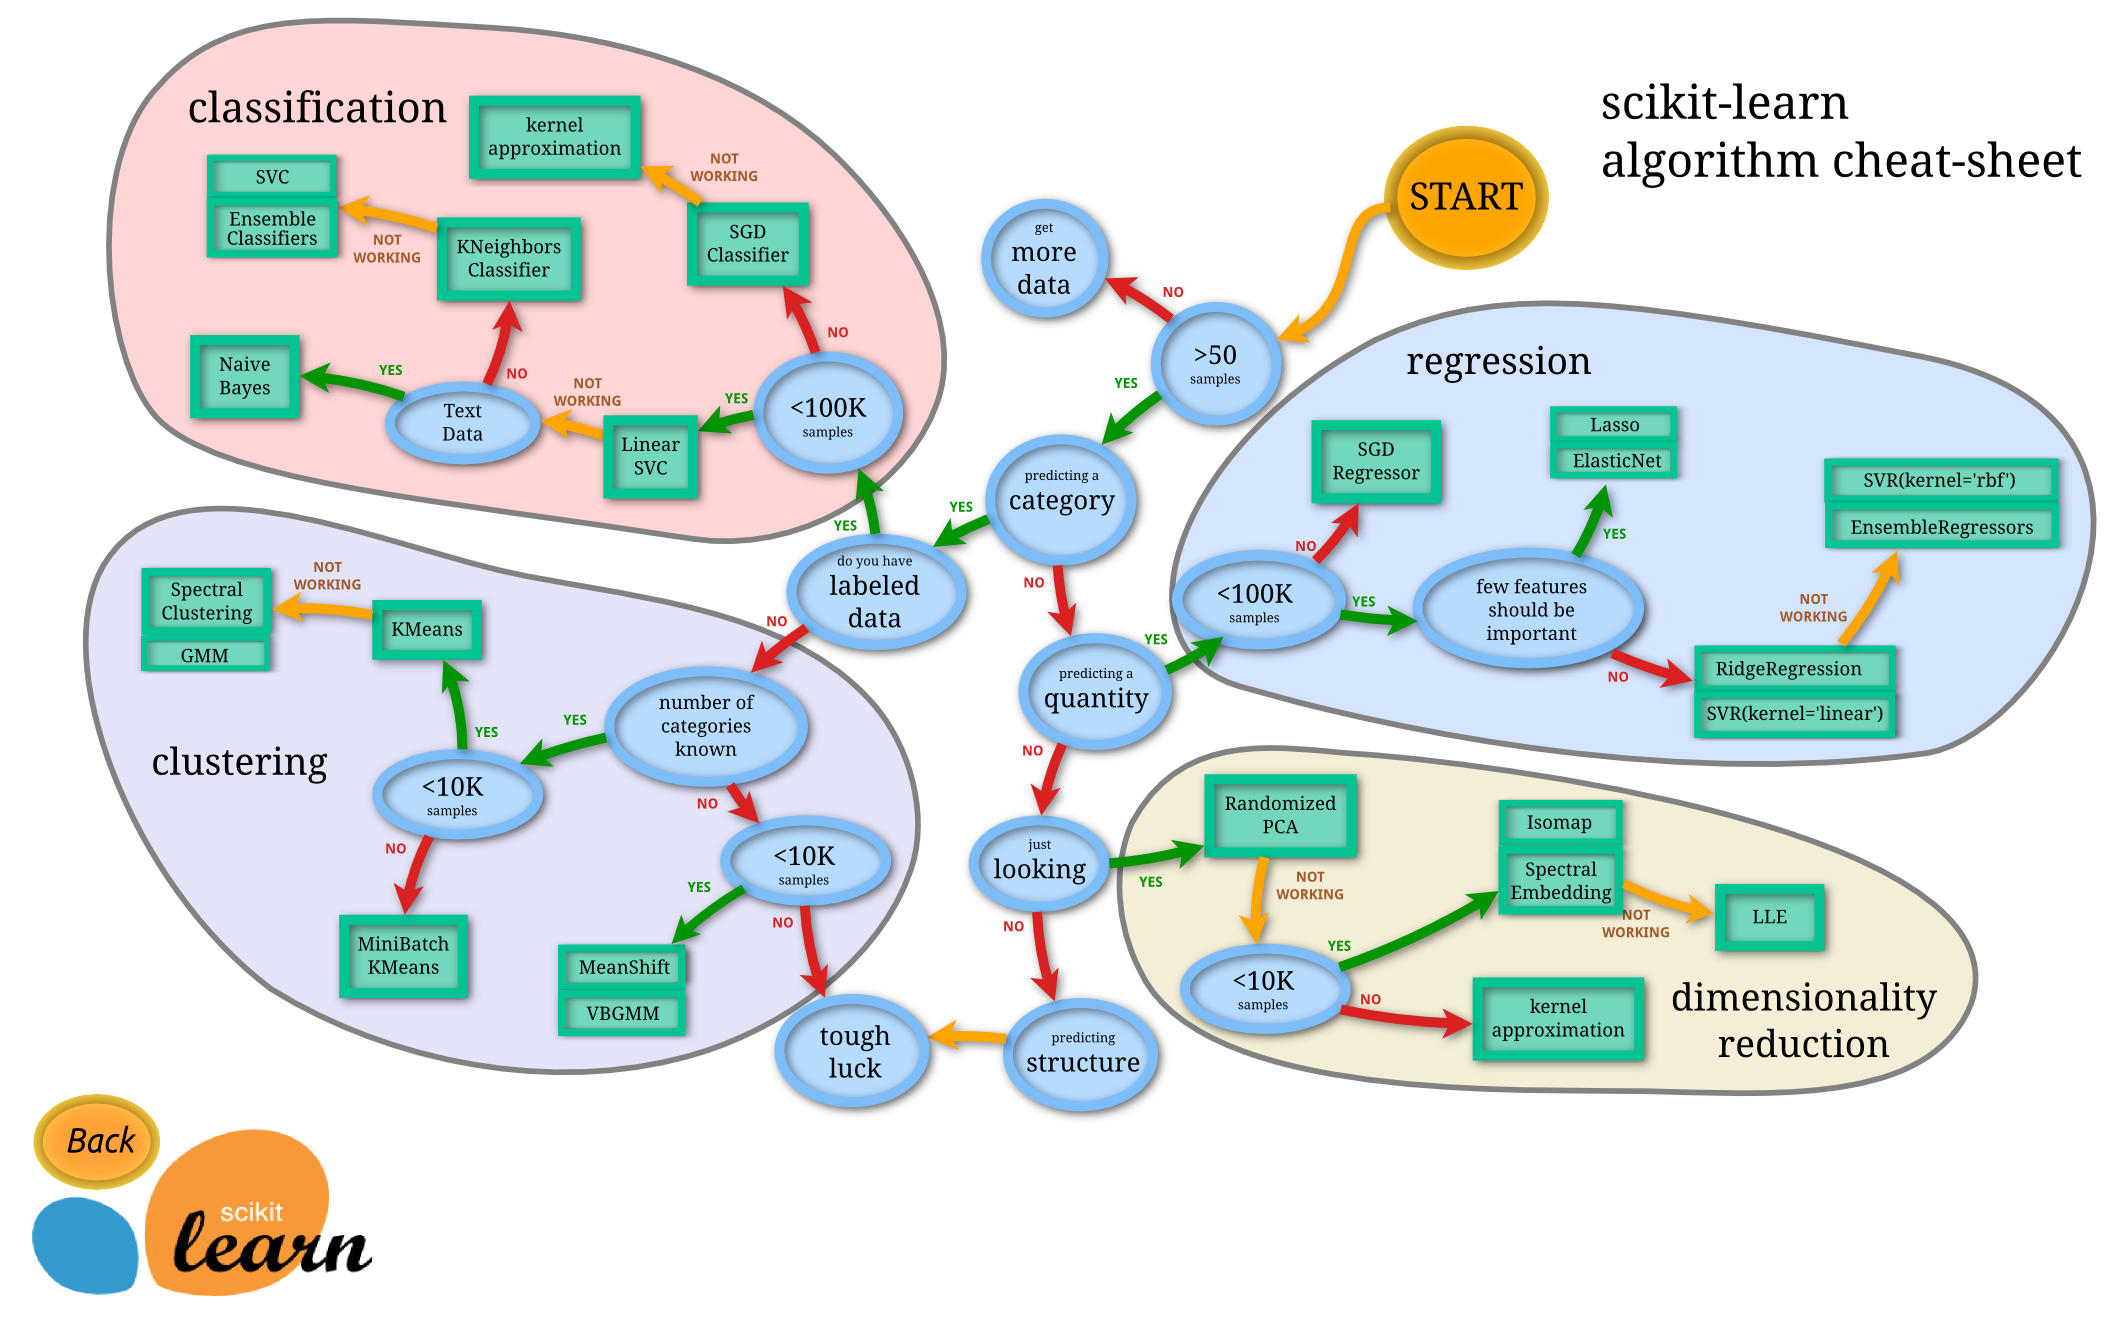

In [146]:
from IPython.display import Image
Image("../Image/ml_map.png")

<b>Wybraliśmy dane związane z rakiem piersi, ponieważ uważamy, że to aktualny i bardzo ważny temat. Który powinniśmy badać, aby lepiej zrozumieć i przeciwdziałać chorobie.</b>

In [147]:
#importujemy bibliotekę pandas oraz matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [148]:
data = pd.read_csv("../Data/breast-cancer-wisconsin-data.csv",header=0)

In [149]:
#wybieramy dwa pierwsze wiersze z danych
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [150]:
val = data.values["diagnosis"== 'M']
val

array([], shape=(0, 569, 33), dtype=object)

<b>Kolumny:
ID - identyfikator danej osoby
Diagnosis - informuje nas o tym czy rak jest złośliwy czy łagodny 
M = złośliwy, B = łagodny</b>
<p>Kolejne kolumny to wartości obliczane dla każdego jądra komórkowego:</p>
<ul>
<li>Radius – Średnia wartość promienia guza od jego środka do punktów na obwodzie</li>
<li>Texture – Odchylenie standardowe wartości w skali szarości, mniejsze odchylenie oznacza, że wartości są bliskie wartości przewidywanej, większe odchylenie przeciwnie</li>
<li>Perimeter – Długość obwodu jądra guza</li>
<li>Area – Całkowity obszar (rozmiar) guza (nie ma większego znaczenia dla określenie zaawansowania stadium)</li>
<li>Smoothness – Zmiany długości promienia nowotworu</li>
<li>Compactness – obwód^2/obszar – zwartość guza </li>
<li>Concavity – Wklęsłość/nieregularność piersi </li>
<li>Concave points – Liczba wklęsłych/nieregularnych części konturu piersi</li>
<li>Symmetry – Symetria piersi (Sama asymetria nie musi jednak oznaczać od razu raka, zaleca się dodatkowe badania)
</li>
<li>Fractal dimension – wymiar fraktalny (wymiar podobieństwa) – samopodobieństwo nowotworu („przybliżenie linii brzegowej” – 1)</li>
</ul>

Zbiór danych jest podzielony na trzy części (od 3 kolumny), od 3 do 13 to średnia, od 13 do 23 to błąd standardowy, od 23 do 32 najgorszy lub najwięszy (średnia z trzech największych wartości) 

Rozkład klas: 357 łagodny, 212 złośliwy

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [152]:
#usuwamy kolumnę Unnamed: 32 
data.drop("Unnamed: 32",axis=1,inplace=True)

In [153]:
#sprwadzamy czy kolumna została usunięta
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [154]:
#ponieważ ID jest nam nie potrzebne, także usuwamy je
data.drop("id", axis = 1, inplace = True)

In [155]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [156]:
#wypisujemy dane ze względu na ich rodzaj, czyli mean,standard error, worst
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [157]:
#Teraz wartości M i B zamieniamy na wartości boolowskie
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [158]:
#Dzięki funkcji describe możemy wypisać podstawowe obliczenia na kolumnach
round(data.describe(),2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,0.37,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,0.48,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,0.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,0.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,0.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,1.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,1.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [159]:
import seaborn as sns #wywołujemy bibliotekę seaborn do wizualizacji danych

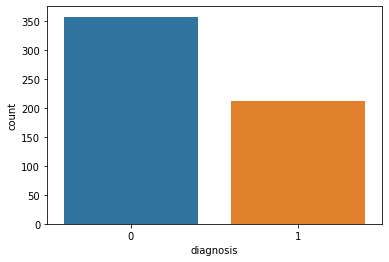

In [160]:
#wyświetlamy wykres słupkowy dwóch wartości 0 i 1,
#skaluje je ilość przypadków ze względu na klasyfikację nowotworu
sns.countplot(data['diagnosis'],label="Count")

TypeError: boxplot() got an unexpected keyword argument 'label'

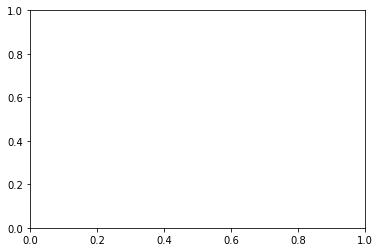

In [189]:
sns.boxplot(x=data['diagnosis'], y=data['Coy'])

In [161]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

<b>Z wykresów możemy wywnioskować, że nowotwory złośliwe, są większe od łagodnych</b>

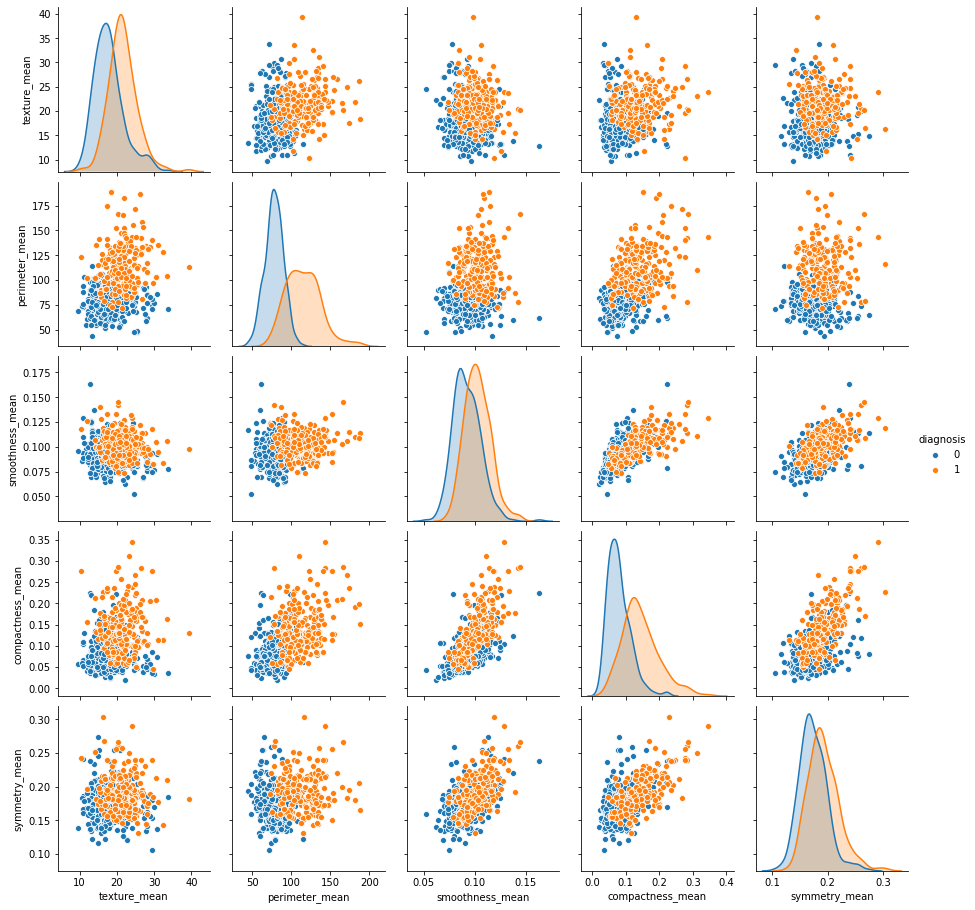

In [162]:
sns.pairplot(data, vars= prediction_var, hue='diagnosis')
plt.ioff()

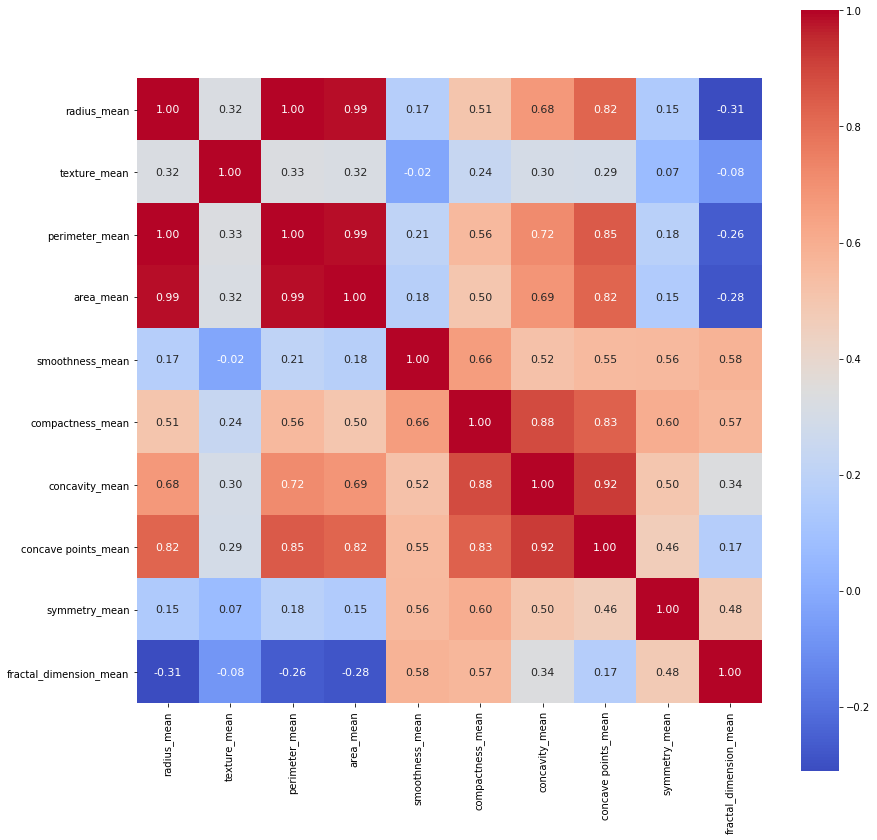

In [163]:
#teraz sprawdzimy korelację między kolumnami 
corr = data[features_mean].corr() # funkcja corr pomaga odnaleść nam koleralcję miedzy danymi
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 11},
           xticklabels= features_mean, yticklabels= features_mean,cmap= 'coolwarm')
#Tworzymy macierz

Z macierza możemy wyczytać:
<ul>
    <li>radius i area są ściśle skorelowane, zgodnie z oczekiwaniem ich relacji</li>
    <li>compactness, concavity i concavepoint są wysoko skorelowane, więc używamy tylko compactness </li>
</ul>
<b>Więc będziemy korzystać z: perimeter_mean, texture_mean, compactness_mean, symmetry_mean</b>
<p>Ponieważ są ze sobą skorelowane</p>

In [164]:
from sklearn.model_selection import train_test_split
#importujemy train_test_split, dzieli ona dane na dwie części

In [165]:
#losowane ziarno z wartością aby dane były stałe
#np.random.seed(48660) 

In [166]:
#teraz rodzielamy dane na train i test
train, test = train_test_split(data, test_size = 0.3)

In [167]:
print(train.shape)

(398, 31)


In [168]:
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
347,0,14.760,14.74,94.87,668.7,0.08875,0.07780,0.046080,0.03528,0.1521,...,17.270,17.93,114.20,880.8,0.1220,0.20090,0.21510,0.12510,0.3109,0.08187
236,1,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.195000,0.12370,0.1909,...,31.010,34.51,206.00,2944.0,0.1481,0.41260,0.58200,0.25930,0.3103,0.08677
175,0,8.671,14.45,54.42,227.2,0.09138,0.04276,0.000000,0.00000,0.1722,...,9.262,17.04,58.36,259.2,0.1162,0.07057,0.00000,0.00000,0.2592,0.07848
223,1,15.750,20.25,102.60,761.3,0.10250,0.12040,0.114700,0.06462,0.1935,...,19.560,30.29,125.90,1088.0,0.1552,0.44800,0.39760,0.14790,0.3993,0.10640
468,1,17.600,23.33,119.00,980.5,0.09289,0.20040,0.213600,0.10020,0.1696,...,21.570,28.87,143.60,1437.0,0.1207,0.47850,0.51650,0.19960,0.2301,0.12240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.01967,0.2538,...,11.210,23.17,71.79,380.9,0.1398,0.13520,0.02085,0.04589,0.3196,0.08009
401,0,11.930,10.91,76.14,442.7,0.08872,0.05242,0.026060,0.01796,0.1601,...,13.800,20.14,87.64,589.5,0.1374,0.15750,0.15140,0.06876,0.2460,0.07262
263,1,15.610,19.38,100.00,758.6,0.07840,0.05616,0.042090,0.02847,0.1547,...,17.910,31.67,115.90,988.6,0.1084,0.18070,0.22600,0.08568,0.2683,0.06829
451,1,19.590,25.00,127.70,1191.0,0.10320,0.09871,0.165500,0.09063,0.1663,...,21.440,30.96,139.80,1421.0,0.1528,0.18450,0.39770,0.14660,0.2293,0.06091


In [169]:
print(test.shape)

(171, 31)


In [170]:
train_X = train[prediction_var]
train_y=train.diagnosis
test_X= test[prediction_var] 
test_y =test.diagnosis 

<b>Random forest classifier – jest to metoda ensemble learning dla klasyfikacji, regresji oraz innych zadań, które operują poprzez konstrukcję mnogich drzew decyzyjnych. Metoda random forest classifier wprowadza korektę dla drzew decyzyjnych. Bez korekty, drzewa mogłyby mieć problem z przewidywaniem przyszłości z powodu (czasami) zbyt wąskiego zakresu danych które te biorą pod uwagę, co może dać np. złą predykcję.</b>

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
model=RandomForestClassifier(n_estimators=100) 

In [173]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
#dopasowanie modelu do danych
model.fit(train_X,train_y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
#predaction będzie zawierało prognozowaną warotość
prediction=model.predict(test_X)

In [176]:
from sklearn import metrics #biblioteka sprawdzająca błędy i poprawność modelu

In [177]:
#użyjemy pomiaru dokładności między przewidywaną wartością, a wyjściowymi wartościami testowymi
metrics.accuracy_score(prediction,test_y)

0.9181286549707602

<b>Dokładność dla modelu wynosi 92%</b>

In [178]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

perimeter_mean      0.511709
compactness_mean    0.191861
texture_mean        0.144628
smoothness_mean     0.090654
symmetry_mean       0.061148
dtype: float64


<h2>Teraz użyjemy SVM (Maszyna wektorów nośnych)</h2>
<p></p>
<b>Support-vector machine (SVM) – Model SVM jest reprezentacją przykładów jako punktów w przestrzeni, zmapowanych tak, że przykłady konkretnych kategorii są przedzielone wyraźną luką (najszerszą możliwą). Nowe przykłady są potem mapowane w te same przestrzenie i przewidują swoją należność do konkretnej kategorii na podstawie luki w którą wpadły.</b>

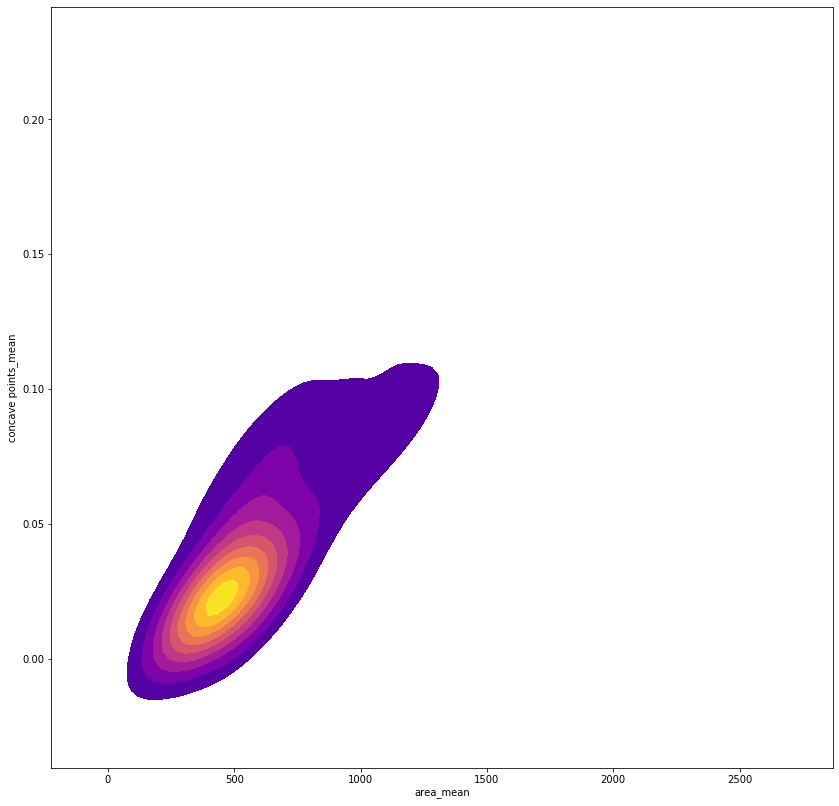

In [179]:
#utworzymy wykres KDE, który pokazuje zależnośc ilości wklęsłych konturów od powierzchni nowotworu
plt.figure(figsize=(14,14))
sns.kdeplot( data['area_mean'], data['concave points_mean'],
                 cmap="plasma", shade=True, shade_lowest=False)

In [180]:
from sklearn import svm 

In [181]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8830409356725146

In [182]:
prediction_var = features_mean

In [183]:
#teraz użyjemy wszystkich kolumn
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [184]:
model=RandomForestClassifier(n_estimators=100)

In [185]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9532163742690059

In [186]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.224051
area_mean                 0.175860
concavity_mean            0.148350
perimeter_mean            0.142817
radius_mean               0.137490
compactness_mean          0.055304
texture_mean              0.054221
smoothness_mean           0.027269
symmetry_mean             0.017560
fractal_dimension_mean    0.017078
dtype: float64
